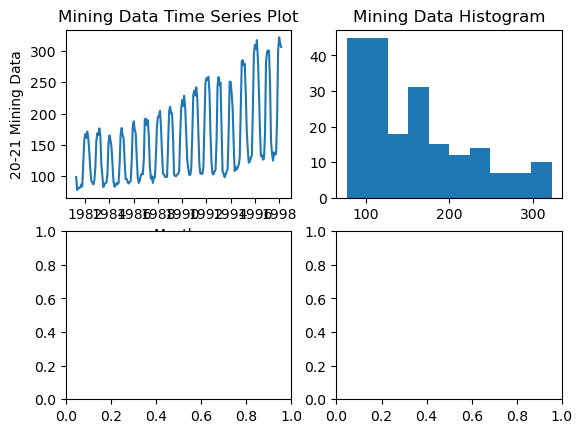

In [1]:
import pandas as pd
import numpy as np 
import os
import calendar
import matplotlib.pyplot as plt
import networkx as nx
from pandas.plotting import scatter_matrix,parallel_coordinates
import seaborn as sns
from sklearn import preprocessing


Mining = pd.read_csv('Timeseries Data.csv')
Mining1 = Mining.iloc[1:,0:2]
Mining1.Months = pd.to_datetime(Mining1.Months,format="%b'%y")
Mining_s = pd.Series(Mining1['20-21'].values,index=Mining1.Months)
figure, axis = plt.subplots(2,2)
axis[0,0].plot(Mining_s)
axis[0,0].set_title('Mining Data Time Series Plot')
axis[0,1].hist(Mining_s,bins=10)
axis[0,1].set_title('Mining Data Histogram')
axis[0,0].set_xlabel('Months')
axis[0,0].set_ylabel('20-21 Mining Data')
plt.show()



## git add Learning_Project.ipynb       
## git commit -m "heat map and box plot"
## git push origin main   

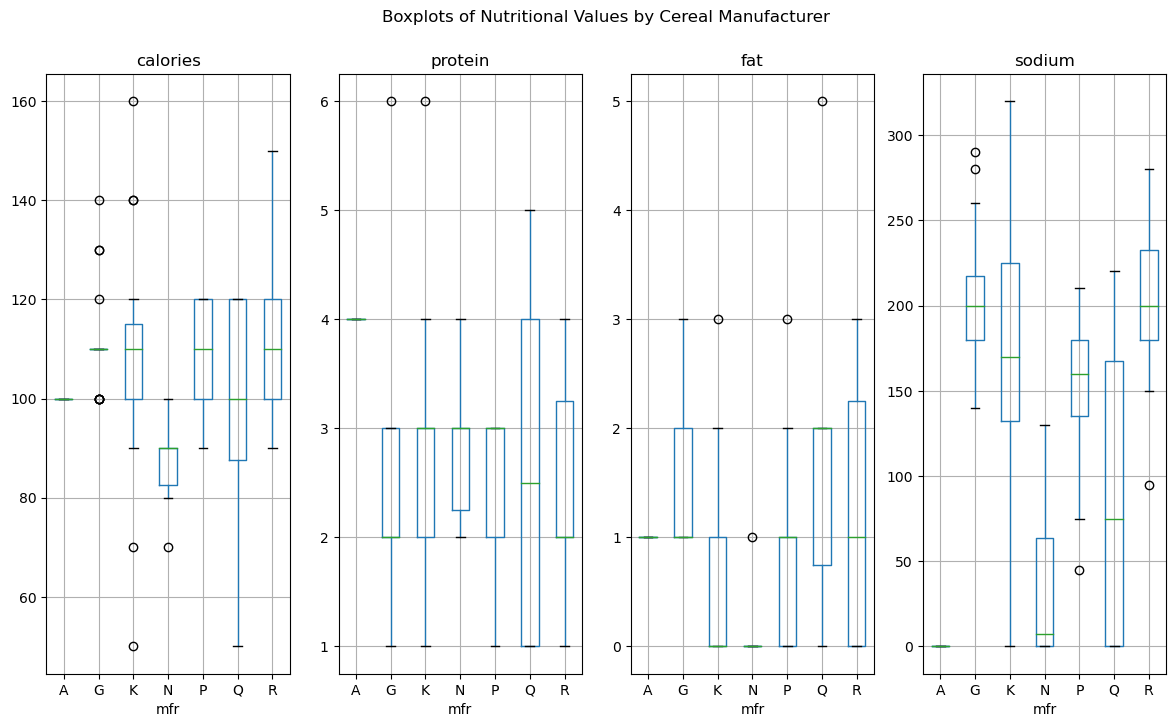

In [2]:
cereals = pd.read_csv('Cereals.csv')
cereals.columns = cereals.columns.str.replace(' ','_')  
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(14,8))

cereals.boxplot(column="calories",ax=axes[0],by='mfr')
cereals.boxplot(column="protein",ax=axes[1],by='mfr')
cereals.boxplot(column="fat",ax=axes[2],by='mfr')
cereals.boxplot(column="sodium",ax=axes[3],by='mfr')
plt.suptitle('Boxplots of Nutritional Values by Cereal Manufacturer')
plt.show()


<class 'pandas.core.frame.DataFrame'>
          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.019066  0.498610  0.300649 -0.293413  0.257638   
protein   0.019066  1.000000  0.208431 -0.054674  0.500330 -0.025012   
fat       0.498610  0.208431  1.000000 -0.005407  0.016719 -0.300003   
sodium    0.300649 -0.054674 -0.005407  1.000000 -0.070675  0.297687   
fiber    -0.293413  0.500330  0.016719 -0.070675  1.000000 -0.380357   
carbo     0.257638 -0.025012 -0.300003  0.297687 -0.380357  1.000000   
sugars    0.566533 -0.291853  0.302497  0.058866 -0.138760 -0.471184   
potass   -0.072063  0.563706  0.200445 -0.042632  0.911528 -0.365003   
vitamins  0.265356  0.007335 -0.031156  0.361477 -0.032243  0.219202   

            sugars    potass  vitamins  
calories  0.566533 -0.072063  0.265356  
protein  -0.291853  0.563706  0.007335  
fat       0.302497  0.200445 -0.031156  
sodium    0.058866 -0.042632  0.361477  
fiber    -0.138760  0.911528 -0.0322

<AxesSubplot:>

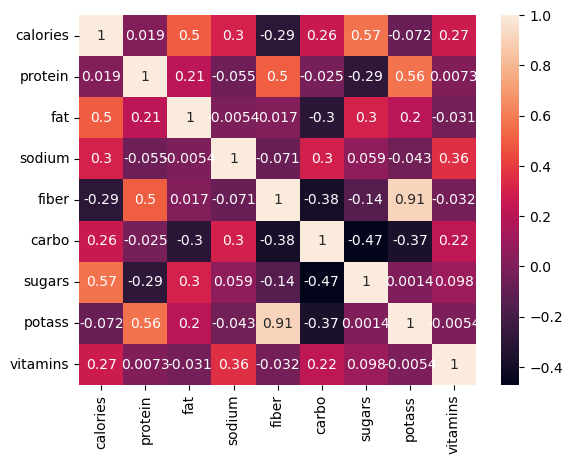

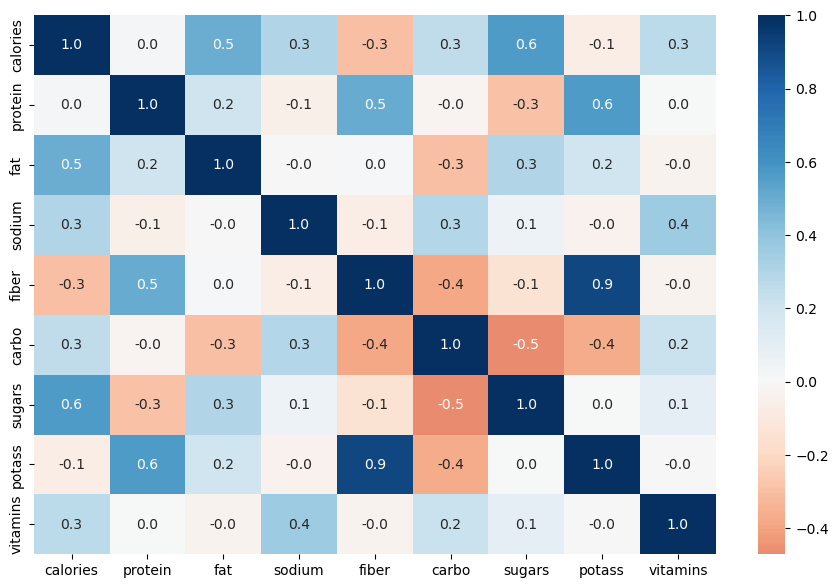

In [10]:
heat_map_table = cereals[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']]
corr=heat_map_table.corr()

print(type(corr))
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
fig,ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,fmt=".1f",cmap="RdBu",center=0,ax=ax)


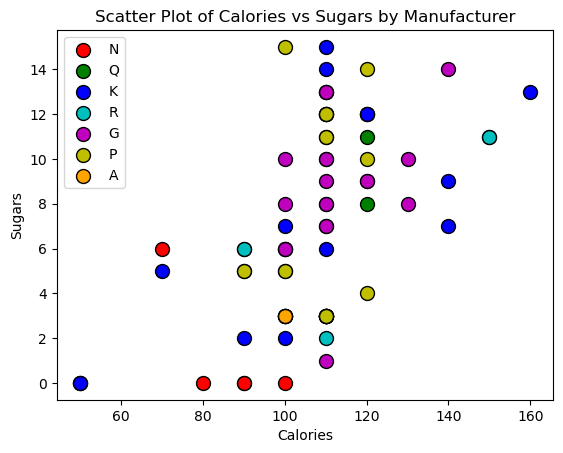

In [4]:
manufacturers = cereals['mfr'].unique()
colors = ['r','g','b','c','m','y','orange']
color_dict = dict(zip(manufacturers,colors))
for mfr in manufacturers:
    subset = cereals[cereals['mfr']==mfr]
    plt.scatter(subset['calories'],subset['sugars'],s=100,c=color_dict[mfr],edgecolors='k',label=mfr)
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.title('Scatter Plot of Calories vs Sugars by Manufacturer')
plt.legend()
plt.show()


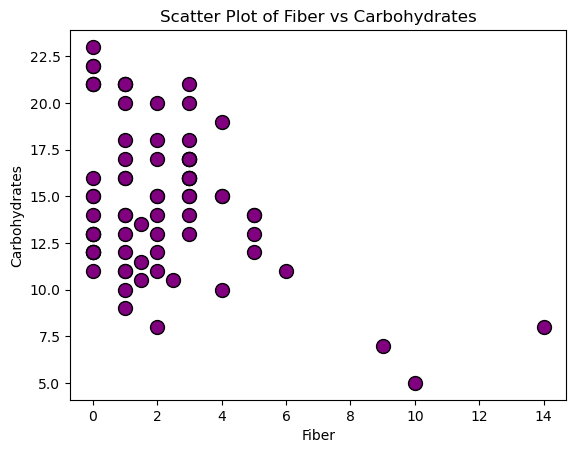

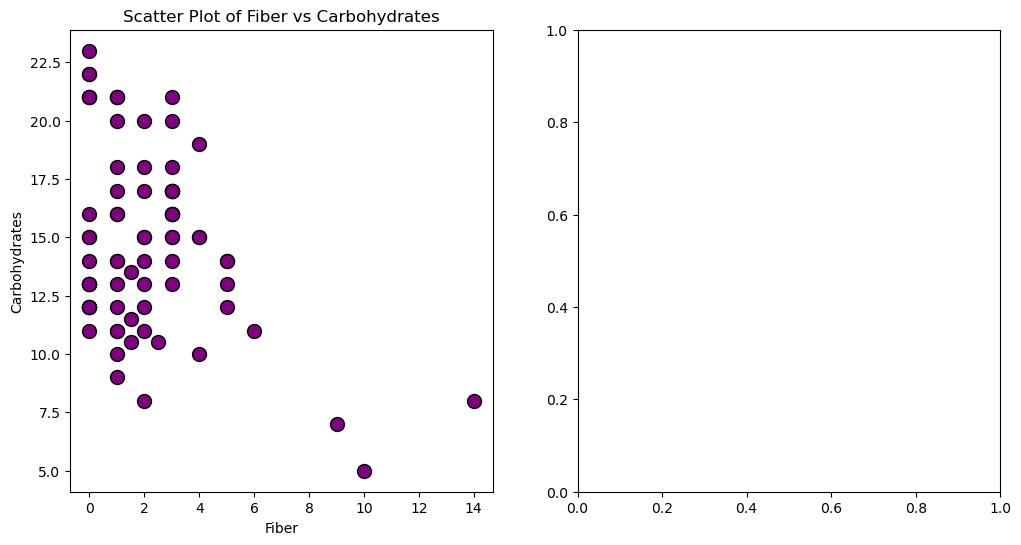

In [5]:
plt.scatter(cereals['fiber'],cereals['carbo'],s=100,c='purple',edgecolors='k')

plt.xlabel('Fiber')
plt.ylabel('Carbohydrates')
plt.title('Scatter Plot of Fiber vs Carbohydrates')
plt.show()

plt.rcParams['axes.formatter.min_exponent'] = 2

figure, axis = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axis[0].scatter(cereals['fiber'],cereals['carbo'],s=100,c='purple',edgecolors='k')
axis[0].set_xlabel('Fiber')
axis[0].set_ylabel('Carbohydrates')
axis[0].set_title('Scatter Plot of Fiber vs Carbohydrates')
plt.show()

axis[1].scatter(cereals['fiber'],cereals['carbo'],s=100,c='orange',edgecolors='k')
axis[1].set_xlabel('Fiber (log scale)')
axis[1].set_ylabel('Carbohydrates (log scale)')
axis[1].set_title('Scatter Plot of Fiber vs Carbohydrates (Log-Log Scale)')
axis[1].set_xscale('log')
axis[1].set_yscale('log')   
plt.show()




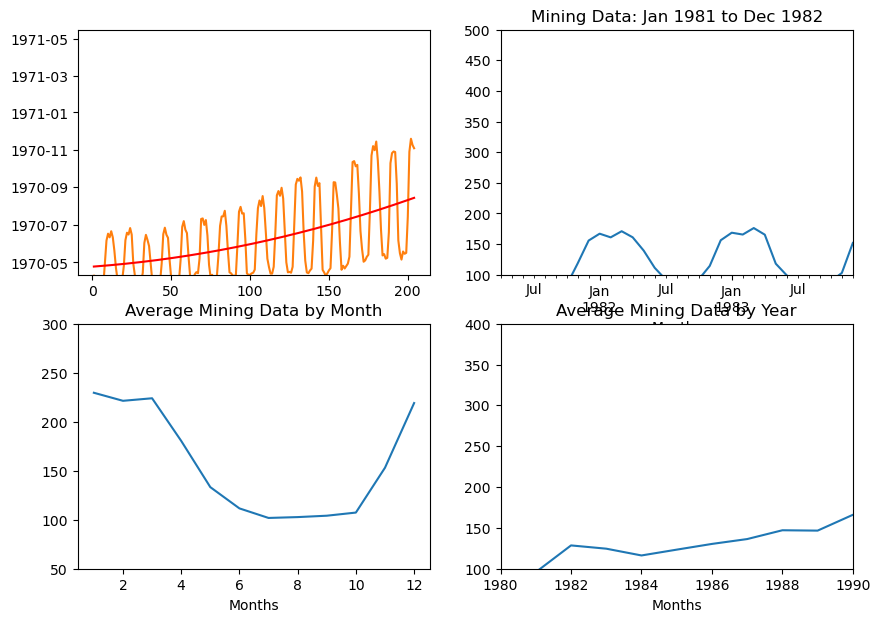

In [6]:
##creating a quadratic fit for time series data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

ts1 = pd.read_csv('Timeseries Data.csv')
ts = ts1.iloc[1:,0:2]
ts.Months = pd.to_datetime(ts.Months,format="%b'%y")
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,7))

quadraticFit = np.poly1d(np.polyfit(range(len(ts)), ts['20-21'], 2))
ts_fit = pd.DataFrame({'Fitted Values':[quadraticFit(t) for t in range(len(ts))]})

ts_fit.index = ts.index
ax = ts.plot(ylim=[100,500],legend=False, ax=axes[0,0])
ts_fit.plot(ax=ax, color='red', legend=False)

#zoom 2 year data 
ts.set_index('Months',inplace=True)
Two_years_data = ts.loc['1981-01-01':'1983-12-01']
ax=Two_years_data.plot(ylim=[100,500],legend=False, title='Mining Data: Jan 1981 to Dec 1982', ax=axes[0,1])


#average by month

byMonth = ts.groupby(ts.index.month).mean()
ax = byMonth.plot(ylim=[50,300],legend=False, title='Average Mining Data by Month', ax=axes[1,0])  


#average by year
byYear = ts.groupby(ts.index.year).mean()
#10 year data 
ax = byYear.plot(ylim=[100,400],legend=False, title='Average Mining Data by Year', ax=axes[1,1],xlim=[1980, 1990])


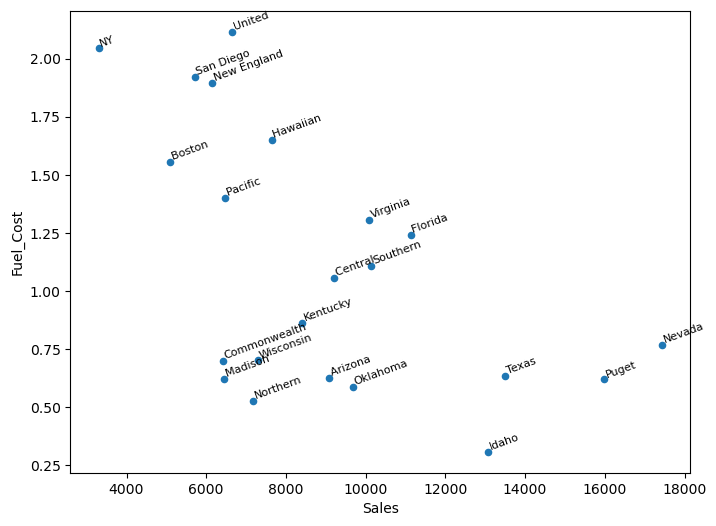

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

utilities_df = pd.read_csv('Utilities.csv')
ax=utilities_df.plot.scatter(x='Sales',y='Fuel_Cost',figsize=(8,6))


points=utilities_df[['Sales','Fuel_Cost','Company']]

#_= means variable output is not neeed so we use _ to ignore it

#applies a function row-wise (because  axis=1 ) on the DataFrame or Series  points .
#ls on the plot  ax  at coordinates unpacked from  x  

_=points.apply(lambda x: ax.text(*x,rotation=20,horizontalalignment='left', verticalalignment='bottom',fontsize=8),axis=1)


<class 'set'>
      Seller     Bidder  Weight  Bidder.Volume  Seller.Volume
0  332874919  718577508       2              3            547
1  594667804  399983466       5              6            183
2  663070601  655828811       1              4            274
3  309608641  599835541       3              8           3986
4  201729374  693022555       1              2           4681
[False, True, False, True, False, True, False, True, False, True, True, True, False, True, True, False, True, False, True, False, True, False, True, True, True, True, False, True, True, False, True, True, False, True, False, True, False, True, False, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, False, True, True, False, True, True, True, True, False, True, False, True, True, True, False, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, 

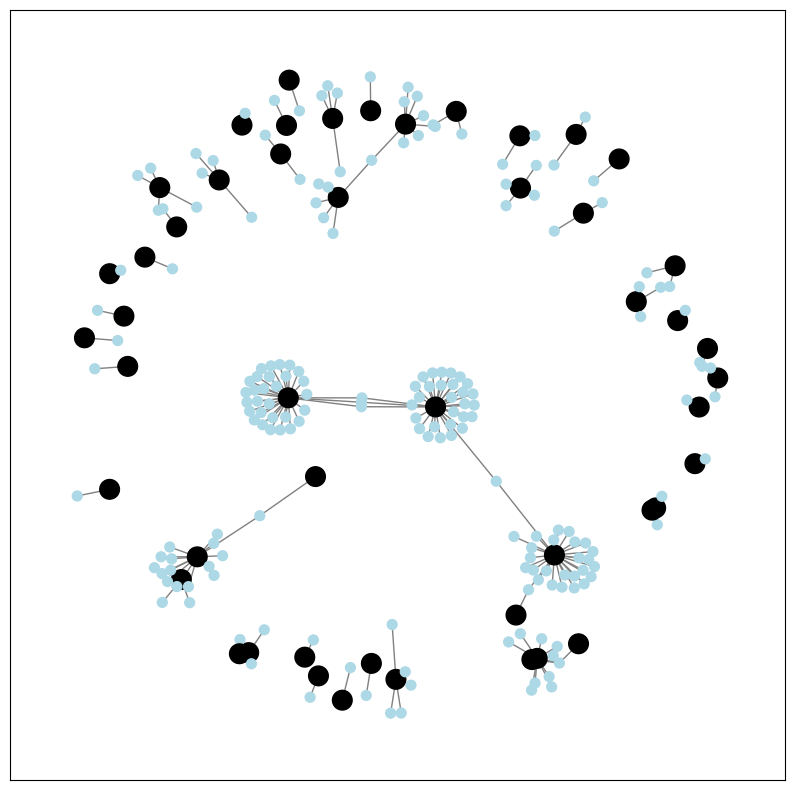

In [8]:
# netrork graph
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ebay_df = pd.read_csv('eBayNetwork.csv')
G = nx.from_pandas_edgelist(ebay_df,source='Seller',target='Bidder')

print(type(set(ebay_df['Bidder'])))
print(ebay_df.head())
isBidder = [n in set(ebay_df['Bidder']) for n in G.nodes()]
print(isBidder)
pos=nx.spring_layout(G,k=0.13,iterations=60,scale=0.5)
plt.figure(figsize=(10,10))

nx.draw_networkx(G, pos=pos, with_labels=False,edge_color='gray',
                 node_color=['lightblue' if bidder else 'black' for bidder in isBidder] ,
                 node_size=[50 if bidder else 200 for bidder in isBidder])

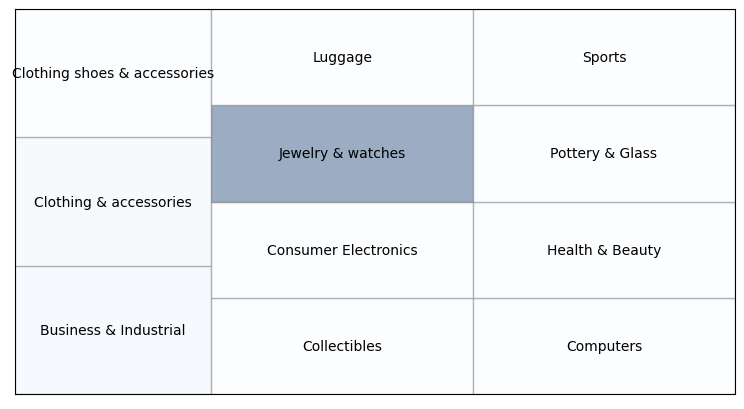

In [37]:
import squarify
import matplotlib.pyplot as plt
import matplotlib
eBayTreemaap = pd.read_csv('eBayTreemap.csv')
grouped=[]

for category, df in eBayTreemaap.groupby(['Category']):
    negativeFeedback =  sum(df['Seller Feedback']<0)/len(df)
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': eBayTreemaap['High Bid'].mean(),
        'value': eBayTreemaap['High Bid'].sum()
    })
byCategory = pd.DataFrame(grouped)

norm=matplotlib.colors.Normalize(vmin=byCategory['negativeFeedback'].min(), vmax=byCategory['negativeFeedback'].max())

colors=[plt.cm.Blues(norm(value)) for value in byCategory['negativeFeedback']]
fig, ax = plt.subplots()
fig.set_size_inches(9,5)

squarify.plot(label=byCategory['category'],sizes=byCategory['averageBid'],color=colors,alpha=0.4,ax=ax,edgecolor='grey')

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.subplots_adjust(left=0.1)
plt.show()

In [41]:
import squarify
import matplotlib.pyplot as plt
import matplotlib
eBayTreemaap = pd.read_csv('eBayTreemap.csv')
grouped=[]

print(eBayTreemaap.groupby(['Category']))

for category, item in eBayTreemaap.groupby(['Category']):
    print(category)
    print(item.info())

for category, df in eBayTreemaap.groupby(['Category']):
    print(category)
    negativeFeedback =  sum(df['Seller Feedback']<0)/len(df)
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': eBayTreemaap['High Bid'].mean(),
        'value': eBayTreemaap['High Bid'].sum()
    })
byCategory = pd.DataFrame(grouped)


Business & Industrial
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 0 to 10077
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   High Bid         1055 non-null   float64
 1   Seller Feedback  1055 non-null   int64  
 2   Category         1055 non-null   object 
 3   Sub-Category     1055 non-null   object 
 4   Brand            1055 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 49.5+ KB
None
Clothing & accessories
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 1027 to 8069
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   High Bid         1359 non-null   float64
 1   Seller Feedback  1359 non-null   int64  
 2   Category         1359 non-null   object 
 3   Sub-Category     1359 non-null   object 
 4   Brand            1359 non-null   object 
dtypes: float64(1), int64(1

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

print(eBayTreemaap.describe())
eBayTreemaap.info()
print(eBayTreemaap.corr())

           High Bid  Seller Feedback
count  10078.000000     10078.000000
mean     258.021813       685.575809
std      913.662476      1555.353206
min        0.750000        -2.000000
25%       22.500000        37.000000
50%       50.035000       191.000000
75%      107.500000       627.750000
max    24500.000000     20316.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10078 entries, 0 to 10077
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   High Bid         10078 non-null  float64
 1   Seller Feedback  10078 non-null  int64  
 2   Category         10078 non-null  object 
 3   Sub-Category     10078 non-null  object 
 4   Brand            10078 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 393.8+ KB
                 High Bid  Seller Feedback
High Bid         1.000000        -0.041184
Seller Feedback -0.041184         1.000000


In [1]:
import pandas as pd
import numpy as np 
import os
import calendar
import matplotlib.pyplot as plt
import networkx as nx

cereals = pd.read_csv('Cereals.csv')
cereals.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


                        name  calories     rating
0                  100%_Bran        70  68.402973
1          100%_Natural_Bran       120  33.983679
2                   All-Bran        70  59.425505
3  All-Bran_with_Extra_Fiber        50  93.704912
4             Almond_Delight       110  34.384843
 
          calories    rating
calories  1.000000 -0.689376
rating   -0.689376  1.000000


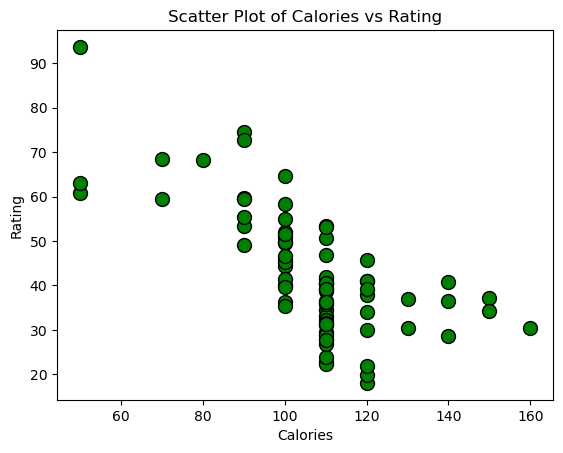

In [6]:
cer_cal_rating = cereals[['name','calories','rating']]

print(cer_cal_rating.head(5))
print( ' ')
cer_cal_rating_corr = cer_cal_rating.corr()
print(cer_cal_rating_corr)

#scatter plot between calories and rating
plt.scatter(cer_cal_rating['calories'],cer_cal_rating['rating'],s=100,c='green',edgecolors='k')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.title('Scatter Plot of Calories vs Rating')
plt.show()


In [3]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc 
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

In [10]:
boston = pd.read_csv("BostonHousing.csv")
#print(boston.info())

excludeColumns = ('ZN', 'MEDV','CAT. MEDV')
predictors = [s for s in boston if s not in excludeColumns]
outcome = 'MEDV'
X = boston[predictors]
y = boston[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.8, random_state=200)
reg = LinearRegression()
reg.fit(train_X,train_y)

regressionSummary(train_y,reg.predict(train_X))
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.6873
            Mean Absolute Error (MAE) : 3.4289
          Mean Percentage Error (MPE) : -3.0413
Mean Absolute Percentage Error (MAPE) : 16.4213

Regression statistics

                      Mean Error (ME) : -0.0264
       Root Mean Squared Error (RMSE) : 5.2114
            Mean Absolute Error (MAE) : 3.7780
          Mean Percentage Error (MPE) : -4.6019
Mean Absolute Percentage Error (MAPE) : 20.7947


/var/folders/5s/463ty3m56wjd923mrhnzsbsr0000gn/T/ipykernel_2479/2712335820.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxdata_df = pred_error_train.append(pred_error_valid, ignore_index=True)


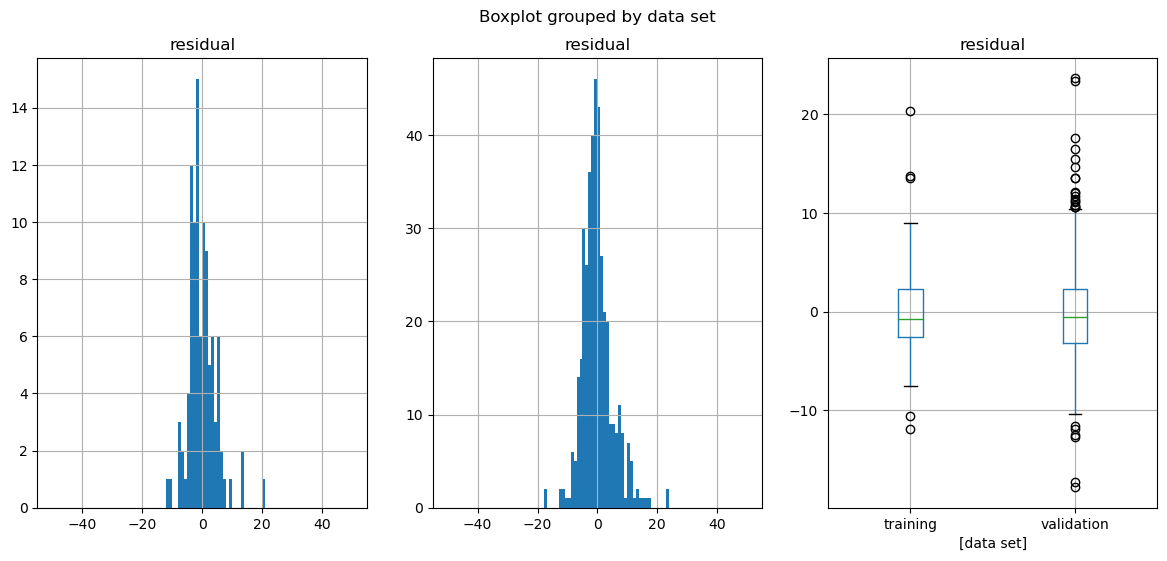

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline

pred_error_train = pd.DataFrame({
    'residual' : train_y - reg.predict(train_X),
    'data set': 'training'
})

pred_error_valid = pd.DataFrame({
    'residual' : valid_y - reg.predict(valid_X),
    'data set': 'validation'
})

boxdata_df = pred_error_train.append(pred_error_valid, ignore_index=True)

fig,axes = plt.subplots(nrows=1, ncols=3)

fig.set_size_inches(14,6)
common = {'bins': 100, 'range': [-50,50]}
pred_error_train.hist(ax=axes[0],**common)
pred_error_valid.hist(ax=axes[1],**common)
boxdata_df.boxplot(ax=axes[2],by = 'data set')

plt.show()